In [1]:
import LinAlg as LA
import DataIO as io
import matplotlib.pyplot as plt
import numpy as np
import Debug
import unittest

## Test Vector Class

In [2]:
v1 = LA.Vector(1, 2, 3)
v2 = LA.Vector(4, 5, 6)

# Add vectors
v3 = v1 + v2
print(f"v1 + v2 = {v3}")

# Subtract vectors
v4 = v1 - v2
print(f"v1 - v2 = {v4}")

# Dot product
dot_product = v1.dot(v2)
print(f"v1 . v2 = {dot_product}")

# Cross product
v5 = v1.cross(v2)
print(f"v1 x v2 = {v5}")

# Magnitude
mag_v1 = v1.magnitude()
print(f"|v1| = {mag_v1}")


v1 + v2 = Vector(5.00, 7.00, 9.00)
v1 - v2 = Vector(-3.00, -3.00, -3.00)
v1 . v2 = 32.0
v1 x v2 = Vector(-3.00, 6.00, -3.00)
|v1| = 3.7416574954986572


In [3]:
file_path = r"./PA_1_Data/pa1-debug-a-calreadings.txt"
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(file_path)

file_path = r"./PA_1_Data/pa1-debug-a-calreadings.txt"
frames_data = io.read_calreadings_file(file_path)
# Example Usage:
calreadings_frames = frames_data
calbody_vectors = a_vectors
# Perform registration for each frame
F_A_point_cloud = LA.perform_calibration_registration(calreadings_frames, calbody_vectors, vector_type='A')

# Output the registration results
for frame_num, result in F_A_point_cloud.items():
    print(f"Frame {frame_num}:")
    print(f"  Rotation matrix (R):\n{result.rotation}")
    print(f"  Translation vector (t): {result.translation}")


Frame 1:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [0. 0. 0.]
Frame 2:
  Rotation matrix (R):
[[ 9.99316743e-01 -2.82571604e-02  2.38239439e-02]
 [ 2.82503422e-02  9.99600685e-01  6.22772503e-04]
 [-2.38320284e-02  5.06875788e-05  9.99715976e-01]]
  Translation vector (t): [ 36.1040255   -3.26179797 242.2408329 ]
Frame 3:
  Rotation matrix (R):
[[ 0.99939304 -0.03193952  0.01390744]
 [ 0.03173441  0.99938783  0.01472743]
 [-0.01436932 -0.01427715  0.99979482]]
  Translation vector (t): [ 26.65991937 255.36388633   5.18728448]
Frame 4:
  Rotation matrix (R):
[[ 9.99955839e-01  9.39736326e-03 -9.59956546e-05]
 [-9.38914352e-03  9.99416625e-01  3.28367790e-02]
 [ 4.04518794e-04 -3.28344276e-02  9.99460723e-01]]
  Translation vector (t): [ -2.00021587 286.08411721 245.24653406]
Frame 5:
  Rotation matrix (R):
[[ 0.99963609 -0.02534023  0.0092501 ]
 [ 0.02526592  0.99964824  0.00806414]
 [-0.00945119 -0.00782749  0.9999247 ]]
  Translation vector 

Frame 1 RMSE: 0.0


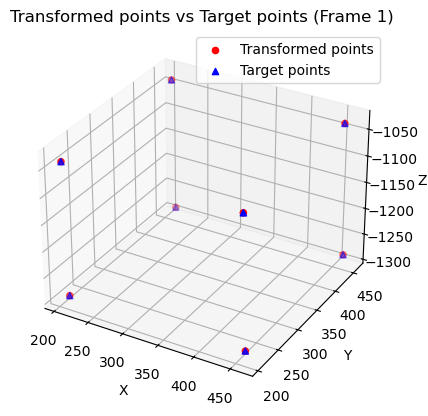

Frame 2 RMSE: 0.002920676488429308


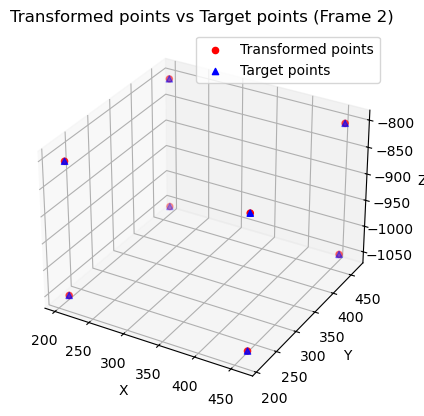

Frame 3 RMSE: 0.0032528387382626534


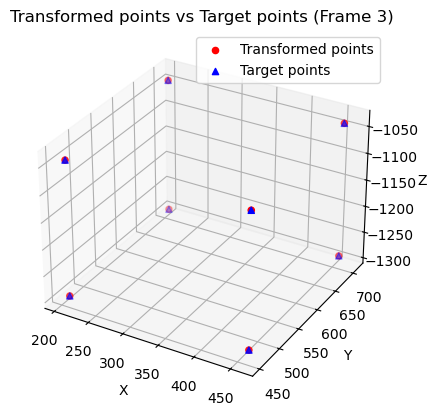

Frame 4 RMSE: 0.003317815950140357


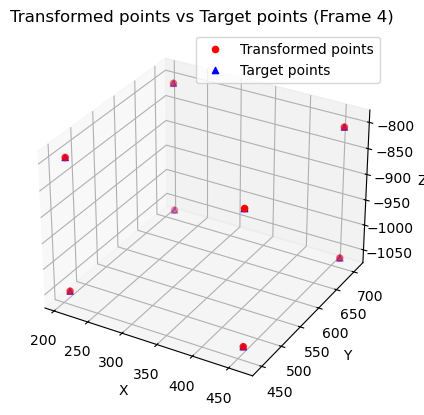

Frame 5 RMSE: 0.003431128803640604


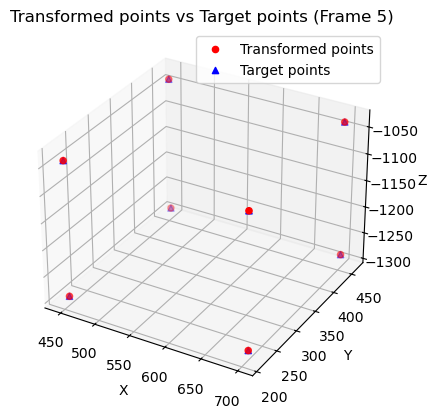

Frame 6 RMSE: 0.0035790237598121166


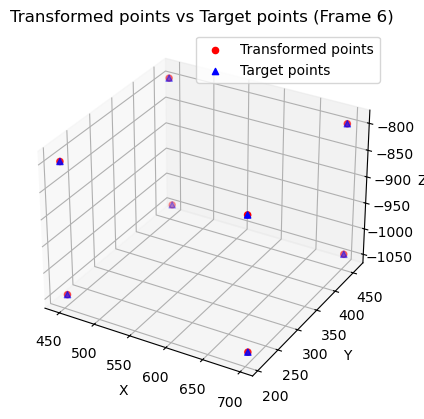

Frame 7 RMSE: 0.0031415200792253017


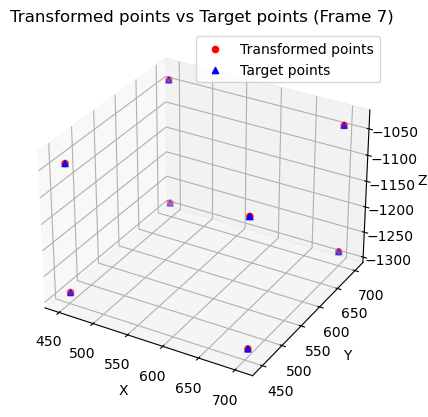

Frame 8 RMSE: 0.0030557289719581604


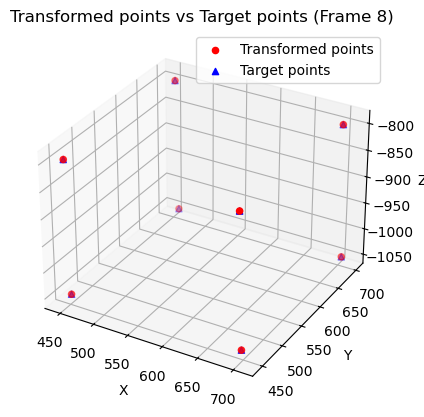

In [4]:

F_A_point_cloud = LA.perform_calibration_registration(calreadings_frames, calbody_vectors, vector_type='A')

rmse_results = {}


for frame_num, frame in F_A_point_cloud.items():
    a_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calbody_vectors]  
    A_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calreadings_frames[frame_num]['A_vectors']] 

    transformed_a_points = LA.transform_points(frame, a_points)

    transformed_array = np.array([v.as_array() for v in transformed_a_points])
    target_array = np.array([v.as_array() for v in A_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse
    print(f"Frame {frame_num} RMSE: {rmse}")

    Debug.plot_3d_transformed_vs_target(frame_num, transformed_a_points, A_points)


Find F_D

In [5]:
file_path = r"./PA_1_Data/pa1-debug-a-calbody.txt"
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(file_path)

file_path = r"./PA_1_Data/pa1-debug-a-calreadings.txt"
frames_data = io.read_calreadings_file(file_path)

calreadings_frames = frames_data
calbody_vectors = d_vectors

F_D_point_cloud = LA.perform_calibration_registration(calreadings_frames, calbody_vectors, vector_type='D')

for frame_num, result in F_D_point_cloud.items():
    print(f"Frame {frame_num}:")
    print(f"  Rotation matrix (R):\n{result.rotation}")
    print(f"  Translation vector (t): {result.translation}")

Frame 1:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]
Frame 2:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]
Frame 3:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]
Frame 4:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]
Frame 5:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]
Frame 6:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]
Frame 7:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]
Frame 8:
  Rotation matrix (R):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
  Translation vector (t): [    0.     0. -1500.]


In [6]:
F_D_frames = F_D_point_cloud

Frame 1 RMSE: 0.0


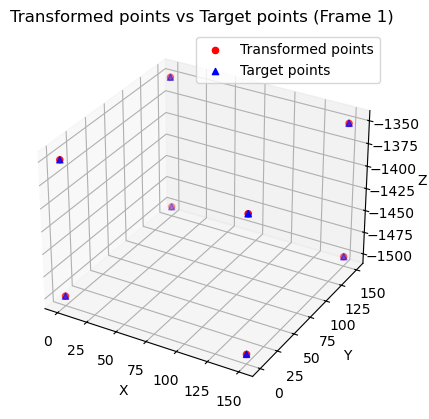

Frame 2 RMSE: 0.0


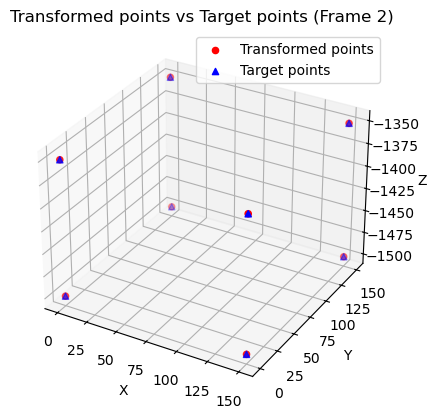

Frame 3 RMSE: 0.0


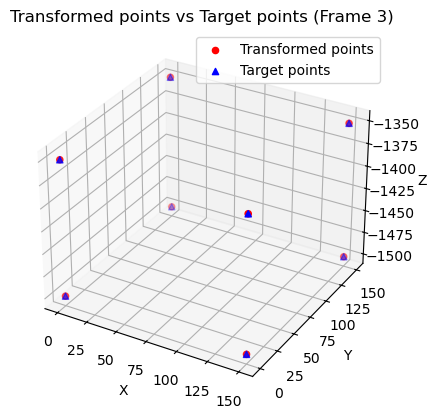

Frame 4 RMSE: 0.0


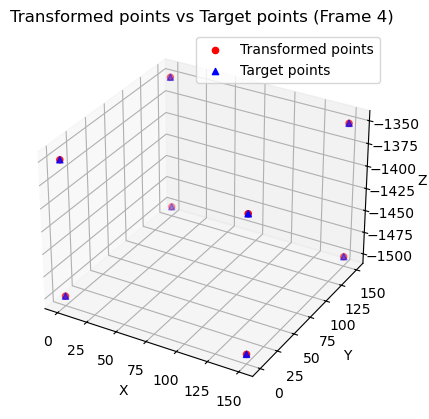

Frame 5 RMSE: 0.0


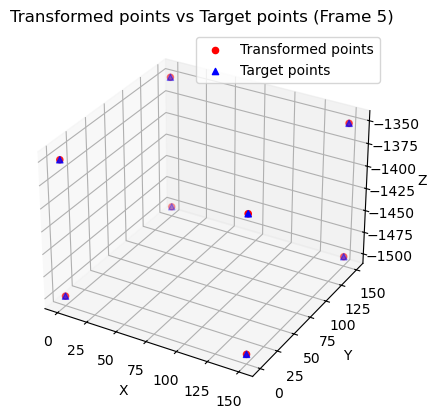

Frame 6 RMSE: 0.0


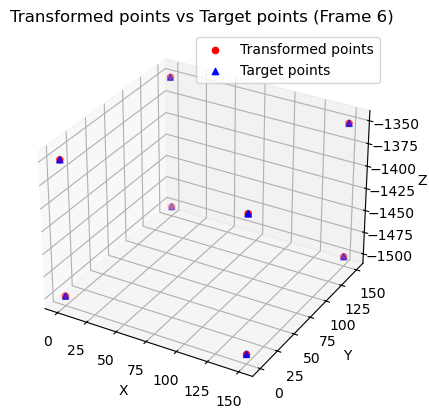

Frame 7 RMSE: 0.0


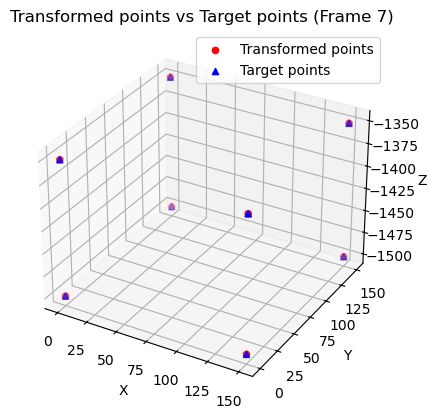

Frame 8 RMSE: 0.0


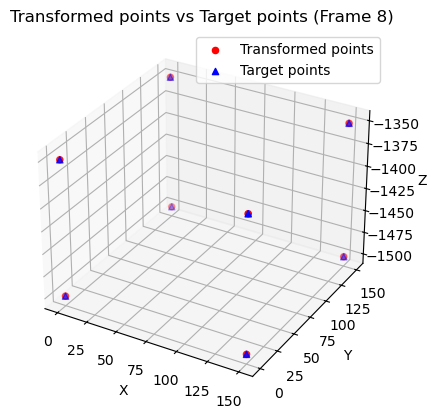

In [7]:
F_D_point_cloud = LA.perform_calibration_registration(calreadings_frames, calbody_vectors, vector_type='D')
calbody_vectors = d_vectors
rmse_results = {}

for frame_num, frame in F_D_point_cloud.items():
    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calbody_vectors]  # Source points (a_vectors)
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in calreadings_frames[frame_num]['D_vectors']]  # Target points


    transformed_d_points = LA.transform_points(frame, d_points)
    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse
    print(f"Frame {frame_num} RMSE: {rmse}")


    Debug.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)


Frame 1 RMSE: 761.8408203125


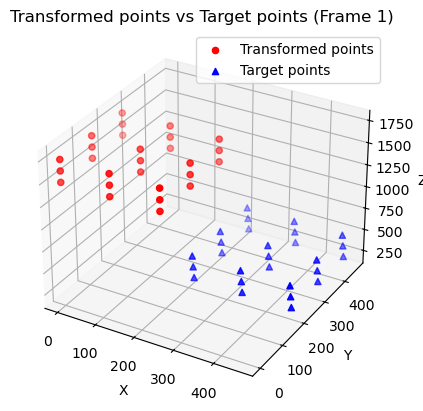

Frame 2 RMSE: 761.839599609375


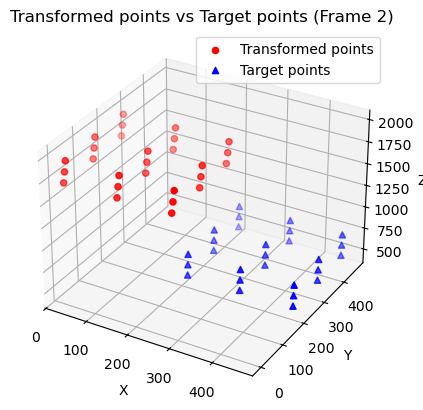

Frame 3 RMSE: 761.8405151367188


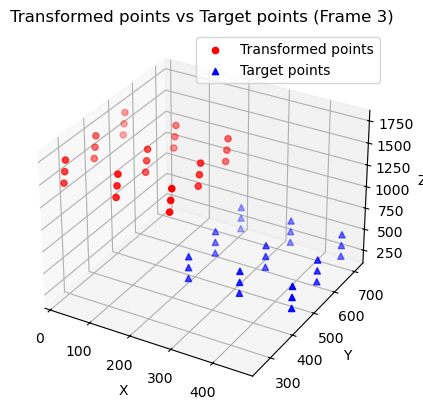

Frame 4 RMSE: 761.8408813476562


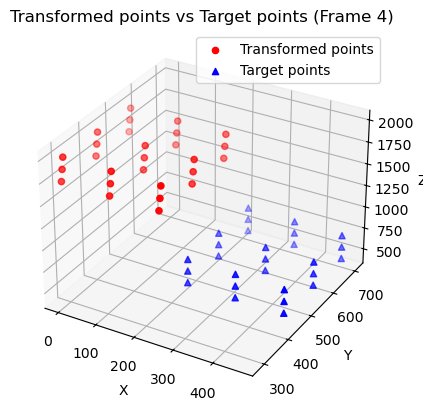

Frame 5 RMSE: 761.84033203125


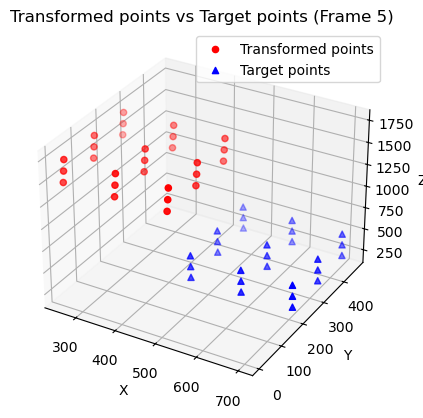

Frame 6 RMSE: 761.8401489257812


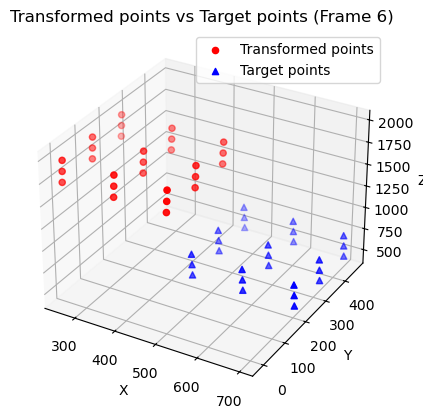

Frame 7 RMSE: 761.84033203125


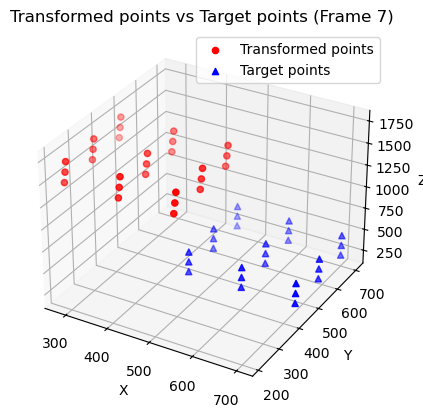

Frame 8 RMSE: 761.8403930664062


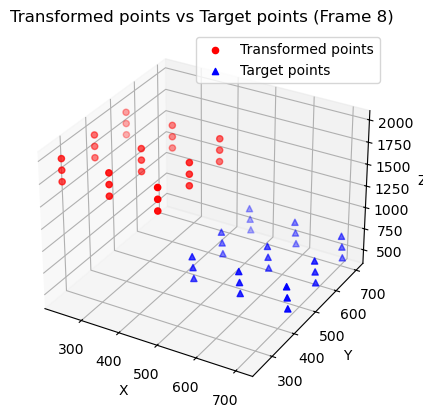

In [8]:
C_expected_results = LA.compute_C_expected(F_D_point_cloud, F_A_point_cloud, c_vectors)

rmse_results = {}

for frame_num, C_expected_vectors in C_expected_results.items():
    C_i_vectors = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['C_vectors']]  # Real C_i point
    C_expected_array = np.array([v.as_array() for v in C_expected_vectors])
    C_i_array = np.array([v.as_array() for v in C_i_vectors])


    rmse = LA.compute_rmse(C_expected_array, C_i_array)
    rmse_results[frame_num] = rmse

    print(f"Frame {frame_num} RMSE: {rmse}")

    Debug.plot_3d_transformed_vs_target(frame_num, C_expected_vectors, C_i_vectors)